https://github.com/QiushiSun

# PUBG-Finish-Placement-Prediction

**简介**：
1. 对数据进行分析，寻找各变量内部的差异与各变量对游戏结果的影响
2. 寻找对游戏结果影响较大的量，对其影响加以解释
3. 构建模型，基于上述任务选择合适的变量加入模型，并对模型的预测效果进行评价
4. 分析提高胜率的方法并总结

先加载需要的包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings # what is warning?~
warnings.filterwarnings("ignore")

## Data Preprocessing & Exploration

In [3]:
train = pd.read_csv('./train_V2.csv',nrows=500000)
# train = pd.read_csv('./train_V2.csv',nrows=500000)

检查一下数据的状态，有29个属性，winPlacePerc是我们的预测目标

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
train.head(8)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368


In [7]:
# IsNull=train.isnull().any() # 检查缺失值

打印一张简易的数据分析表

In [8]:
train.describe().T 

,count,mean,std,min,25%,50%,75%,max
assists,4446966.0,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,4446966.0,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,4446966.0,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,4446966.0,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,4446966.0,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,4446966.0,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,4446966.0,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,4446966.0,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,4446966.0,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,4446966.0,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


## Overview of Data

一切开始之前，先对数据集中的各一些属性做一下热力图分析，找出强相关的内容

In [5]:
train_set_sub =  train[['assists', 'boosts', 'damageDealt', 'DBNOs', 'heals', 'kills', 'revives', 
                        'rideDistance', 'walkDistance', 'swimDistance', 'matchDuration', 'weaponsAcquired',
                         'winPlacePerc']] # 最后一个属性是我们的预测目标，先看看它们之间的关系
# 对于组队游戏而言，队友是一个不可控因素，在相关性分析中先剔除
train_set_sub = train_set_sub[:500000]

**winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

**winPlacePerc**是预测的目标，Perc就是Percentile（百分位数）的意思

<AxesSubplot:>

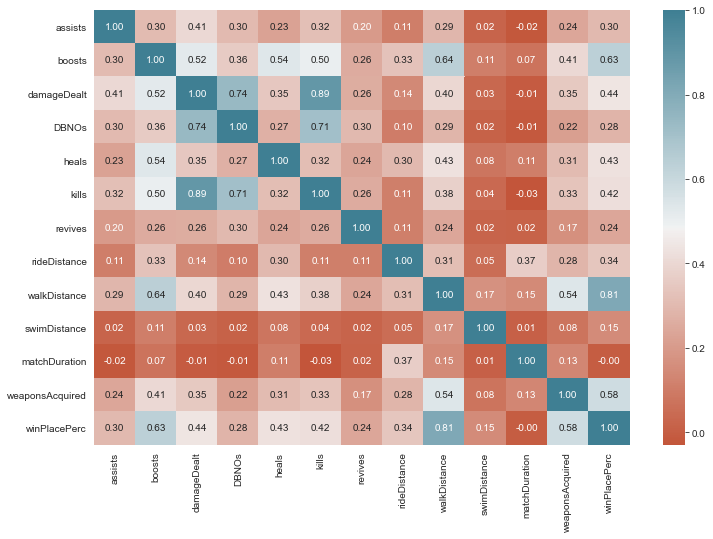

In [6]:
corr_mat = train_set_sub.corr()
sns.set_style('whitegrid')
plt.subplots(figsize = (12,8))
sns.heatmap(corr_mat, 
            fmt='.2f', 
            annot=True, 
            xticklabels=corr_mat.columns, 
            yticklabels=corr_mat.columns,
            cmap=sns.diverging_palette(20, 220, n=250)) # cmap 主题

上面有很多属性为缩写，先做一下名词解释（顺便翻译一下）

1. **DBNOs** - Number of enemy players knocked.（比赛中击倒了多少个敌人，击倒不一定会死，可能会被队友救）
2. **assists** - Number of enemy players this player damaged that were killed by teammates.（助攻个数）
3. **boosts** - Number of boost items used.（提升能力的物品，应该指头盔，甲，能量饮料或者肾上腺素这类的东西）
4. **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.（造成的伤害的总和，减去对自己造成的伤害）
5. **headshotKills** - Number of enemy players killed with headshots.（爆头击杀个数）
6. **heals** - Number of healing items used.（药品使用数量，绷带医药包之类的物品）
6. **Id** - Player’s Id（玩家的Id）
7. **killPlace** - Ranking in match of number of enemy players killed.（击杀个数排名）
8. **killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
9. **killStreaks** - Max number of enemy players killed in a short amount of time.（短时间内击杀的敌人数量的最大值）
10. **kills** - Number of enemy players killed.（击杀敌人个数）
11. **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.（长程击杀距离的最大值）
12. **matchDuration** - Duration of match in seconds.（比赛时长，以秒计）
13. **matchId** - ID to identify match. There are no matches that are in both the training and testing set.
14. **matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.（比赛类型）
15. **rankPoints** - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.（玩家的排名）
16. **revives** - Number of times this player revived teammates.（救起队友次数）
17. **rideDistance** - Total distance traveled in vehicles measured in meters.（在载具上的移动距离）
18. **roadKills** - Number of kills while in a vehicle.（在载具上击杀敌人的数量）
19. **swimDistance** - Total distance traveled by swimming measured in meters.（游泳距离）
20. **teamKills** - Number of times this player killed a teammate.（击杀队友的数量(●'◡'●)）
21. **vehicleDestroys** - Number of vehicles destroyed.（击毁载具数量）
22. **walkDistance** - Total distance traveled on foot measured in meters.（行走距离）
23. **weaponsAcquired** - Number of weapons picked up.（捡了多少把武器）
24. **winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
25. **groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.（组队游戏的的组号）
26. **numGroups** - Number of groups we have data for in the match.（一场比赛里有多少队伍）
27. **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

为了方便分析，对前面的HeatMap做一个改造，去掉重复元素然后按照相关程度大小进行排列，如下所示

<AxesSubplot:>

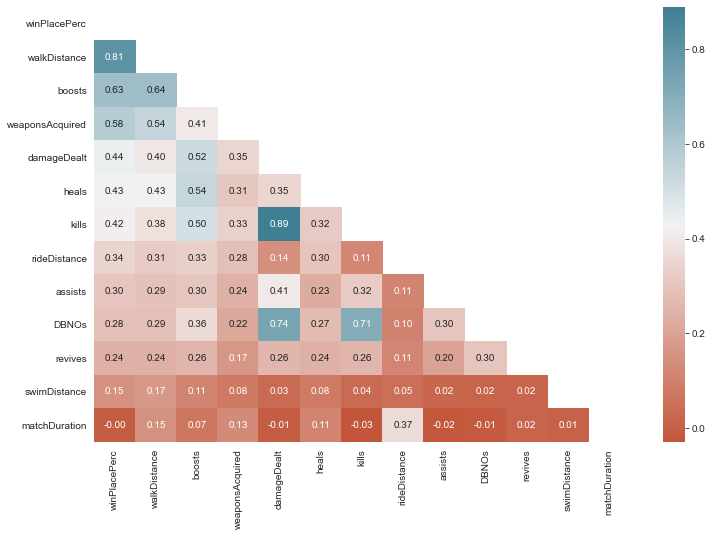

In [7]:
corr_mat = train_set_sub.corr()
mask = np.zeros_like(corr_mat, dtype=np.bool) # 形成一个用于mask的矩阵
mask[np.triu_indices_from(mask)] = True # 做mask
factor_num = 13
cols = corr_mat.nlargest(factor_num, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(train[cols].values.T)

sns.set_style('whitegrid')
plt.subplots(figsize = (12,8))
sns.heatmap(cm, 
            fmt='.2f', 
            mask = mask,
            annot=True, 
            xticklabels=cols.values,
            yticklabels=cols.values,
            cmap=sns.diverging_palette(20, 220, n=250)) # cmap 主题
# 清理后的热力图如下所示

这样清理过就比之前清楚多了，从heatmap可以看出，有三样东西和玩家在比赛中的排名相关性很大，我先简单罗列，然后做一点基于个人理解的解释
1. boosts（关联度大）
2. walkDistance（关联度最大）
3. weaponsAcquired（关联度大）

**Brief Explanation：**
1. boosts：boosts指的是提升性能的道具，比如红牛或者是肾上腺素，打了以后可以回血和提高跑步速度，对长期比赛肯定是有益的
2. walkDistance：这个和胜利相关是很显然的，因为随着比赛不断地缩圈，活得越久跑动距离越是大，从heatmap也可以看到这个是相关性最强的一个属性
3. weaponsAcquired：捡到武器的数量随着游戏的进行肯定是变多的（还要考虑消耗性物品，比如投掷类武器），此外游戏后期的空投也会给武器，事实上，武器获取量的多少还是取决于存活时间的

## 属性分析

### 击杀与伤害分析

显然，对于吃鸡玩家而言，击杀是获得比赛胜利绕不过去的一个话题，所以我们先对击杀与玩家所造成的伤害进行分析

In [12]:
kill_data = train['kills'].copy()

In [13]:
kill_data.max()

72

可见单场比赛中，击杀数量最多的这位老哥送走了72人...，这种样本属于极端值（可能是挂），我们分析一下整体的击杀情况

In [14]:
data = train.copy()
print('killing count quantile(0.99):',data['kills'].quantile(0.99))
print('killing count quantile(0.995):',data['kills'].quantile(0.995))
print('killing count quantile(0.999):',data['kills'].quantile(0.999))

killing count quantile(0.99): 7.0
killing count quantile(0.995): 8.0
killing count quantile(0.999): 12.0


可见完成7个击杀即可超过99%的玩家，完成12个击杀即可超过99.9%的玩家，我们取0.995分位作为数据分析的主要部分，其余归纳到一项中

In [15]:
data.loc[data['kills'] > data['kills'].quantile(0.995)] = '9+'

In [16]:
data['kills']

0          0
1          0
2          0
3          0
4          1
          ..
4446961    0
4446962    0
4446963    0
4446964    2
4446965    2
Name: kills, Length: 4446966, dtype: object

In [17]:
data['kills'].astype('str').sort_values().values # sanity check

array(['0', '0', '0', ..., '9+', '9+', '9+'], dtype=object)

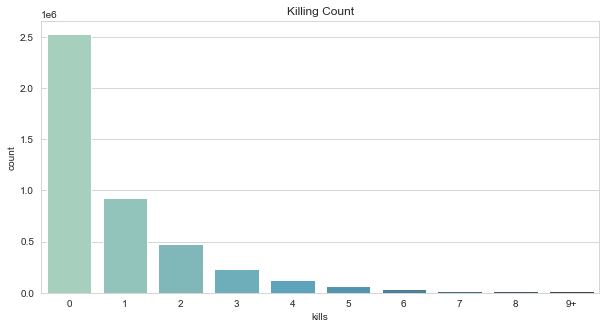

In [18]:
plt.figure(figsize=(10,5))
# rc = {'font.sans-serif': 'SimHei',
#       'axes.unicode_minus': False}
# sns.set(context='notebook', style='ticks', font='SimHei', rc=rc) # Seaborn也可以使用这个中文字体
sns.countplot(data['kills'].astype('str').sort_values(),palette="GnBu_d")
# plt.title("Killing Count（击杀统计）",fontsize=12)
plt.title("Killing Count",fontsize=12)
plt.show()

In [58]:
print("平均击杀: {:.3f} players, 99% 的玩家获得了小于等于{}个killings, 击杀最多的玩家获得的killings为{}.".format(train['kills'].mean(),train['kills'].quantile(0.99), train['kills'].max()))

平均击杀: 0.925 players, 99% 的玩家获得了小于等于7.0个killings, 击杀最多的玩家获得的killings为72.


可见，击杀很明显地服从一个长尾分布，大部分玩家一个人都没击杀就被淘汰了，极少数玩家能完成6个及以上的击杀

接下来比较一下不同击杀情况下，造成的伤害的差别，分别取机组数据进行实验

In [20]:
mean_damage_dealt = [] # 维护一个数组存储每种击杀的伤害均值

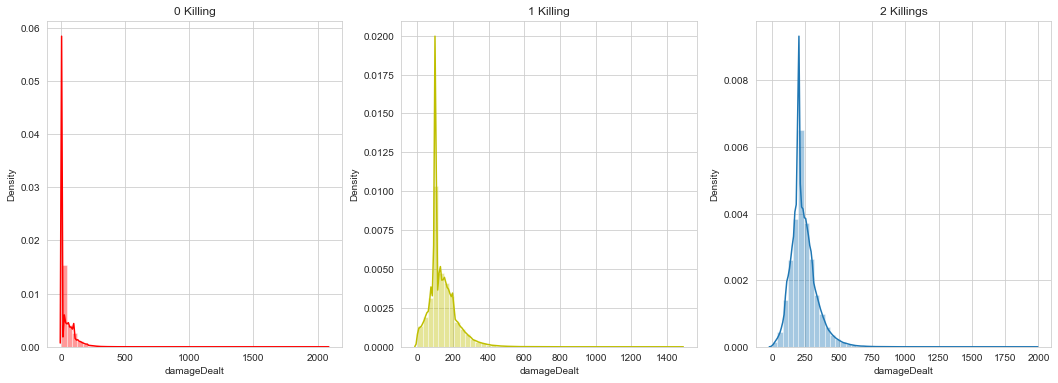

In [21]:
# 取击杀0，1，2三种情况
plot_data = train.copy()
fig,axes=plt.subplots(1,3,figsize=(18, 6))
data0 = plot_data[plot_data['kills']==0]
data1 = plot_data[plot_data['kills']==1]
data2 = plot_data[plot_data['kills']==2]
# plt.figure(figsize=(12,6.5))
sns.distplot(data0['damageDealt'],vertical=False,ax=axes[0],color = 'r')
mean_damage_dealt.append(data0['damageDealt'].values.mean())
sns.distplot(data1['damageDealt'],vertical=False,ax=axes[1],color = 'y')
mean_damage_dealt.append(data1['damageDealt'].values.mean())
sns.distplot(data2['damageDealt'],vertical=False,ax=axes[2])
mean_damage_dealt.append(data2['damageDealt'].values.mean())
axes[0].title.set_text('0 Killing')
axes[1].title.set_text('1 Killing')
axes[2].title.set_text('2 Killings')
plt.show()

In [22]:
data3 = plot_data[plot_data['kills']==3]
data4 = plot_data[plot_data['kills']==4]
mean_damage_dealt.append(data3['damageDealt'].values.mean())
mean_damage_dealt.append(data4['damageDealt'].values.mean())

将这几组数据放在一起展示，效果如下，可以看到整体上非常明显的差异

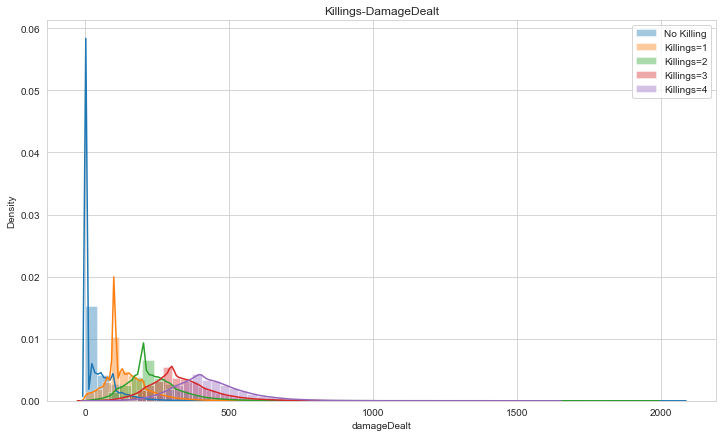

In [23]:
fig = plt.figure(figsize=(12, 7))
sns.distplot(data0['damageDealt'], kde=True,label='No Killing')
sns.distplot(data1['damageDealt'], kde=True,label='Killings=1')
sns.distplot(data2['damageDealt'], kde=True,label='Killings=2')
sns.distplot(data3['damageDealt'], kde=True,label='Killings=3')
sns.distplot(data4['damageDealt'], kde=True,label='Killings=4')
plt.legend()
plt.title('Killings-DamageDealt')
plt.show()

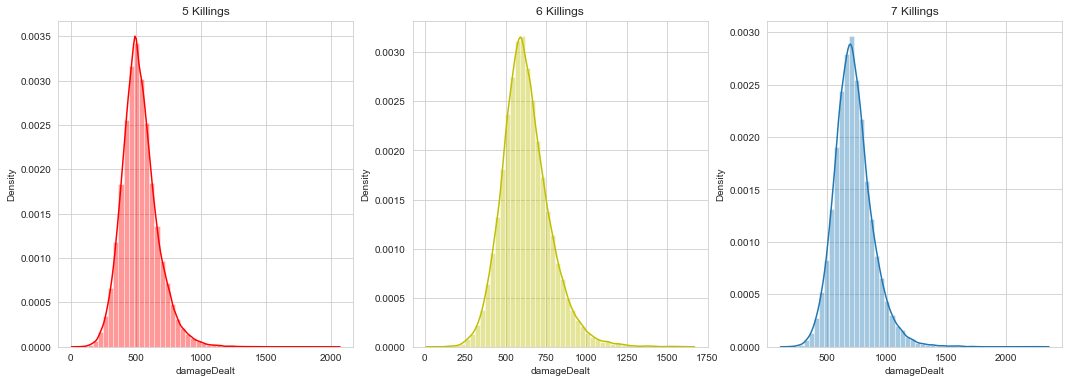

In [24]:
fig,axes=plt.subplots(1,3,figsize=(18, 6))
data5 = plot_data[plot_data['kills']==5]
data6 = plot_data[plot_data['kills']==6]
data7 = plot_data[plot_data['kills']==7]
# plt.figure(figsize=(12,6.5))
sns.distplot(data5['damageDealt'],vertical=False,ax=axes[0],color = 'r')
mean_damage_dealt.append(data5['damageDealt'].values.mean())
sns.distplot(data6['damageDealt'],vertical=False,ax=axes[1],color = 'y')
mean_damage_dealt.append(data6['damageDealt'].values.mean())
sns.distplot(data7['damageDealt'],vertical=False,ax=axes[2])
mean_damage_dealt.append(data7['damageDealt'].values.mean())
axes[0].title.set_text('5 Killings')
axes[1].title.set_text('6 Killings')
axes[2].title.set_text('7 Killings')
plt.show()

In [25]:
mean_damage_dealt # 此处也可以看到，伤害均值随着击杀数显然是现著上升的

[40.677958158327264,
 138.82277895814903,
 233.90658578543227,
 331.8449852693802,
 429.3400621472102,
 528.4993382098922,
 625.8617947839831,
 723.1218280161349]

上图中可以看到，在击杀数量分别为5，6，7时，数据符合两边低，中间高的分布，符合常理，但是因为尺寸的关系，看上去似乎各组样本均值都很接近（错觉），我们把它们放在同一张图里，即可看到随着击杀数量增加，造成伤害的均值增长

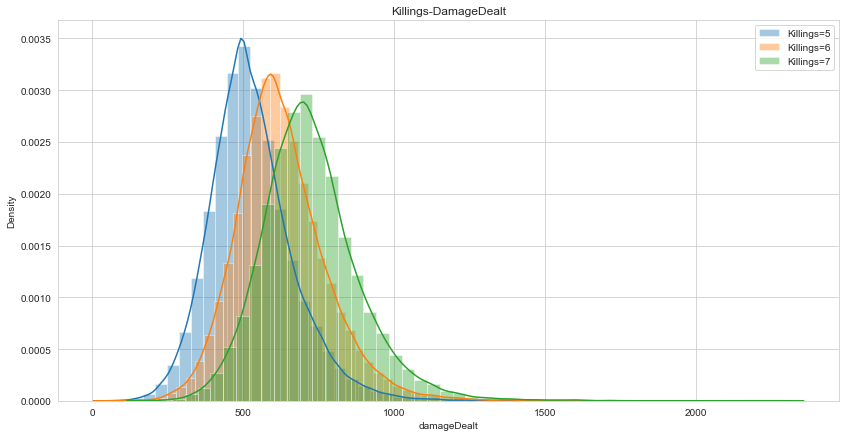

In [26]:
fig = plt.figure(figsize=(14, 7))
sns.distplot(data5['damageDealt'], kde=True,label='Killings=5')
sns.distplot(data6['damageDealt'], kde=True,label='Killings=6')
sns.distplot(data7['damageDealt'], kde=True,label='Killings=7')
plt.legend()
plt.title('Killings-DamageDealt')
plt.show()

接下来展示一下击杀数量和最终排名比的关系

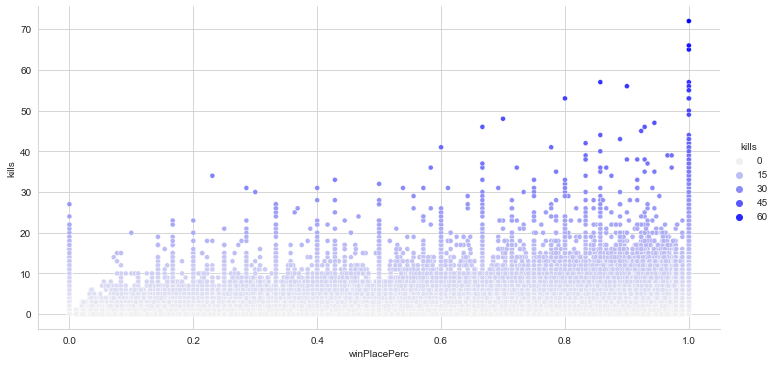

In [27]:
sns.relplot(x="winPlacePerc",
            y="kills",
            data=train,
            s=25,
            palette='light:b',
            hue='kills',
            height=5,
            aspect=2)
plt.show()

**Conclusion1: Killings与排名/吃鸡概率正相关，同样，可以推出对敌人造成的伤害量(DamageDealt)越大，获得高排名和吃鸡的较高**

（但这不是唯一的获得高排名的方式，仅仅是数据之间的正相关关系，这同样也不意味着必须通过造成大量伤害才能获得高排名，老阴逼一样是可以赢的）

此外，对于击杀而言，在小组比赛中需要考虑到友军误伤，但这种随机性太大了，只做简要分析

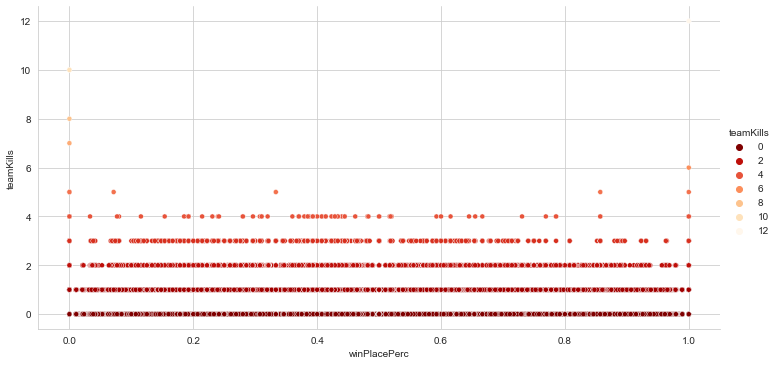

In [103]:
# sns.color_palette("light:b", as_cmap=True)
sns.relplot(x="winPlacePerc",
            y="teamKills",
            data=train,
            s=25,
            palette='OrRd_r',
            hue='teamKills',
            height=5,
            aspect=2)
plt.show()

In [99]:
print("击杀队友最多的玩家杀死了:", max(train.teamKills),'个队友') #传说中的25仔

击杀队友最多的玩家杀死了: 12 个队友


从散点图也可以看出，友军击杀发生频率很低，绝大多数都是0友军击杀，若出现了友军击杀，不太会导致较高的胜利排名

### 道具使用分析

接下来分析道具的使用，主要分为两种
1. boosts
2. 医疗用品

从之前的heatmap分析中我们已经发现了使用boosts道具和使用医疗药品对最后的游戏排名有正面影响，先使用散点图看一下二者的相关关系

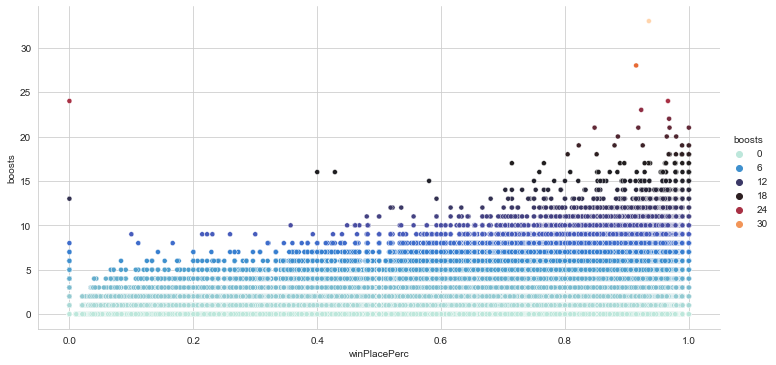

In [28]:
sns.color_palette("light:b", as_cmap=True)
sns.relplot(x="winPlacePerc",
            y="boosts",
            data=train,
            s=25,
            palette="icefire",
            hue='boosts', # 能量饮料或者肾上腺素什么的
            height=5,
            aspect=2)
plt.show()

可见，使用boosts道具对胜利而言是明显正相关的，这与之前的猜测无异

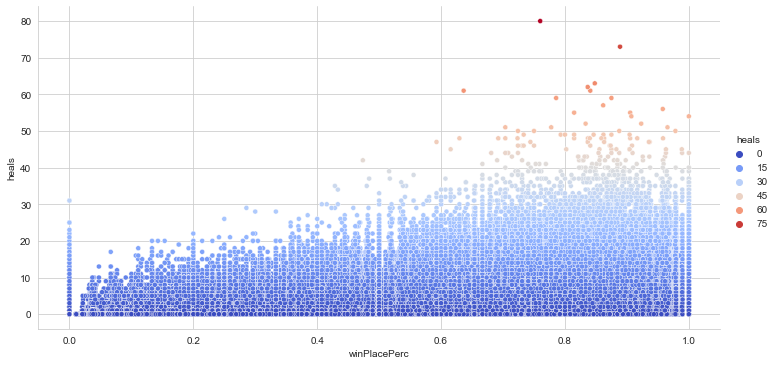

In [29]:
# sns.color_palette("light:b", as_cmap=True)
sns.relplot(x="winPlacePerc",
            y="heals",
            data=train,
            s=25,
            palette="coolwarm",
            hue='heals', # 使用的药品，如绷带，医药箱
            height=5,
            aspect=2)
plt.show()

同样地，能在游戏里苟多久很大程度上取决于医疗用品，与boosts一样是强正相关的关系，在模型构建时需要把这两个因子一并考虑

Text(0.5, 1.0, 'Boosts-winPlacePerc')

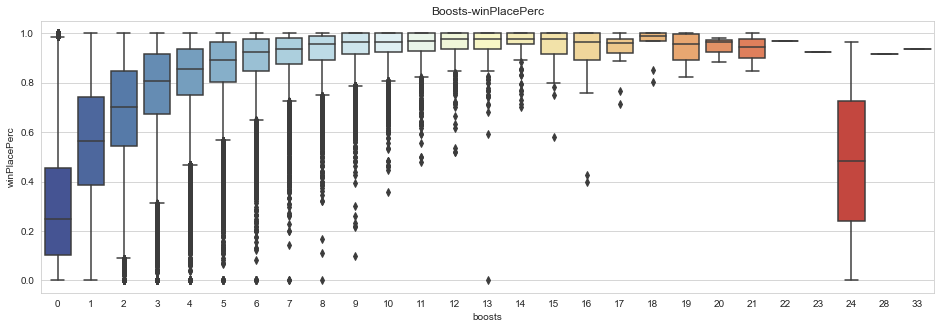

In [88]:
f, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(x='boosts', y="winPlacePerc",data=train,palette='RdYlBu_r')
fig.axis(ymin=0, ymax=1)
plt.title('Boosts-winPlacePerc')

Boosts物品的箱形图中也可以显著地看出二者的正相关关系

Text(0.5, 1.0, 'Heals-winPlacePerc')

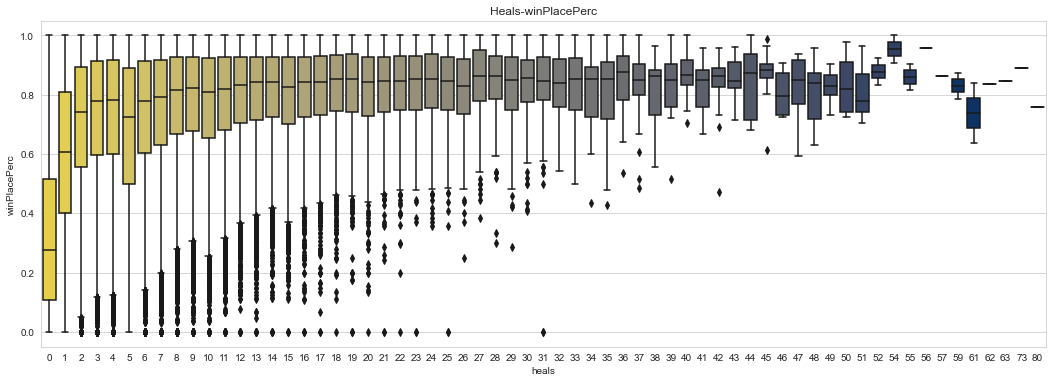

In [109]:
f,ax = plt.subplots(figsize=(18, 6))
sns.boxplot(x='heals', y="winPlacePerc",data=train,palette='cividis_r')
fig.axis(ymin=0, ymax=1)
plt.title('Heals-winPlacePerc')

对Heals的箱形图的分析也可以看出存在与胜利排名的正相关关系，但没有Boosts这么显著

**Conclusion2: 使用boosting物品（能量饮料，肾上腺素等）越多，吃鸡概率越高**

**Conclusion3: 使用的医疗用品数量与排名现著正相关，争夺这类资源（如果包放得下）对长期的生存有益**

### 武器数量对游戏获胜的影响

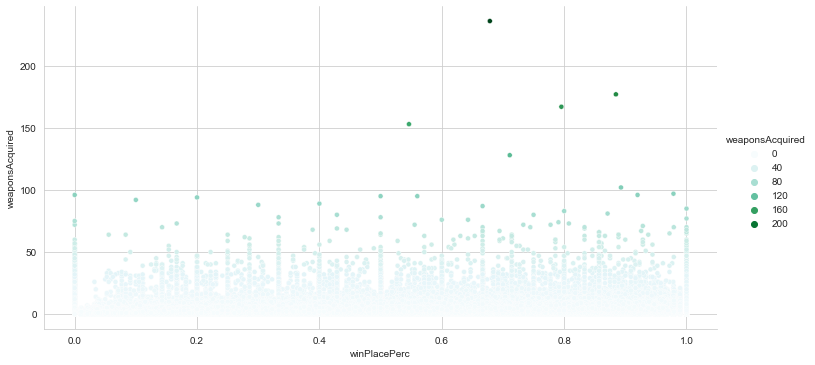

In [57]:
sns.relplot(x="winPlacePerc",
            y="weaponsAcquired",
            data=train,
            s=25,
            palette="BuGn",
            hue='weaponsAcquired', # 使用的武器数量
            height=5,
            aspect=2)
plt.show()

从上述分析可以看出，对与最终获得胜利而言，武器的数量不像前几个属性一样强正相关，个人认为武器数量达到一个峰值后就不再对胜利排名做出贡献，我们对这个属性进行进一步分析

In [60]:
weapon_data = train['weaponsAcquired'].copy()

In [61]:
print('捡枪最多的玩家获得了',weapon_data.max(),'把武器') # 我不知道是怎么捡到这么多的

捡枪最多的玩家获得了 236 把武器


In [80]:
weapon_data = train.copy()
print('Weapons Acquired quantile(0.95):',weapon_data['weaponsAcquired'].quantile(0.95))
print('Weapons Acquired quantile(0.99):',weapon_data['weaponsAcquired'].quantile(0.99))
print('Weapons Acquired quantile(0.995):',weapon_data['weaponsAcquired'].quantile(0.995))
print('Weapons Acquired quantile(0.999):',weapon_data['weaponsAcquired'].quantile(0.999))

Weapons Acquired quantile(0.95): 8.0
Weapons Acquired quantile(0.99): 10.0
Weapons Acquired quantile(0.995): 12.0
Weapons Acquired quantile(0.999): 18.0


可见，获得大于等于12把武器就已经超过了99%的玩家的武器获取量，接下来对比一下武器数量和造成的伤害之间的关系

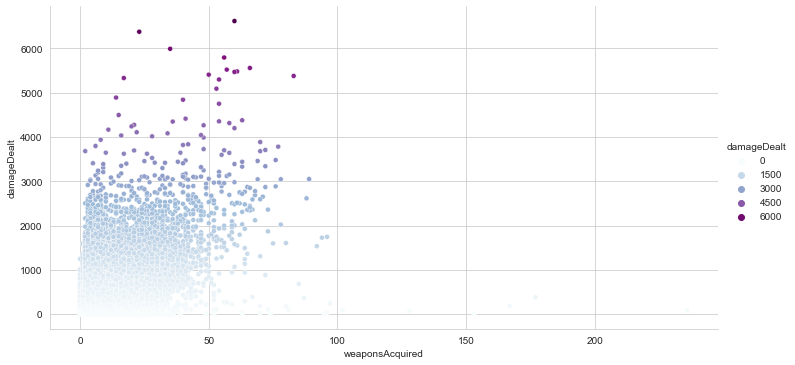

In [69]:
# sns.color_palette("light:b", as_cmap=True)
sns.relplot(x="weaponsAcquired",
            y="damageDealt",
            data=train,
            s=25,
            palette='BuPu',
            hue='damageDealt',
            height=5,
            aspect=2)
plt.show()

从上面的散点图分析可见，武器数量与造成的伤害量略有正向关系，这就说明，从整体上而言，并非是拣枪最多的人制造了最多的killings和伤害，我认为合理的解释是大部分玩家选择多捡适配口径的子弹，而非持续更换武器

In [81]:
weapon_data.loc[weapon_data['weaponsAcquired'] > weapon_data['weaponsAcquired'].quantile(0.95)] = '9+'
weapon_data['kills'].astype('str').sort_values().values # sanity check

array(['0', '0', '0', ..., '9+', '9+', '9+'], dtype=object)

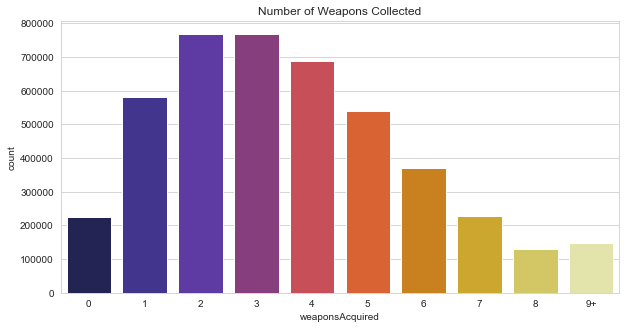

In [82]:
plt.figure(figsize=(10,5))
sns.countplot(weapon_data['weaponsAcquired'].astype('str').sort_values(),palette="CMRmap")
plt.title("Number of Weapons Collected",fontsize=12)
plt.show()

将武器获取量最高的5%的玩家归为一类，可以发现少部分玩家落地成盒，一把武器都没有获得，而总体玩家中绝大多数人在游戏中使用1-6把武器

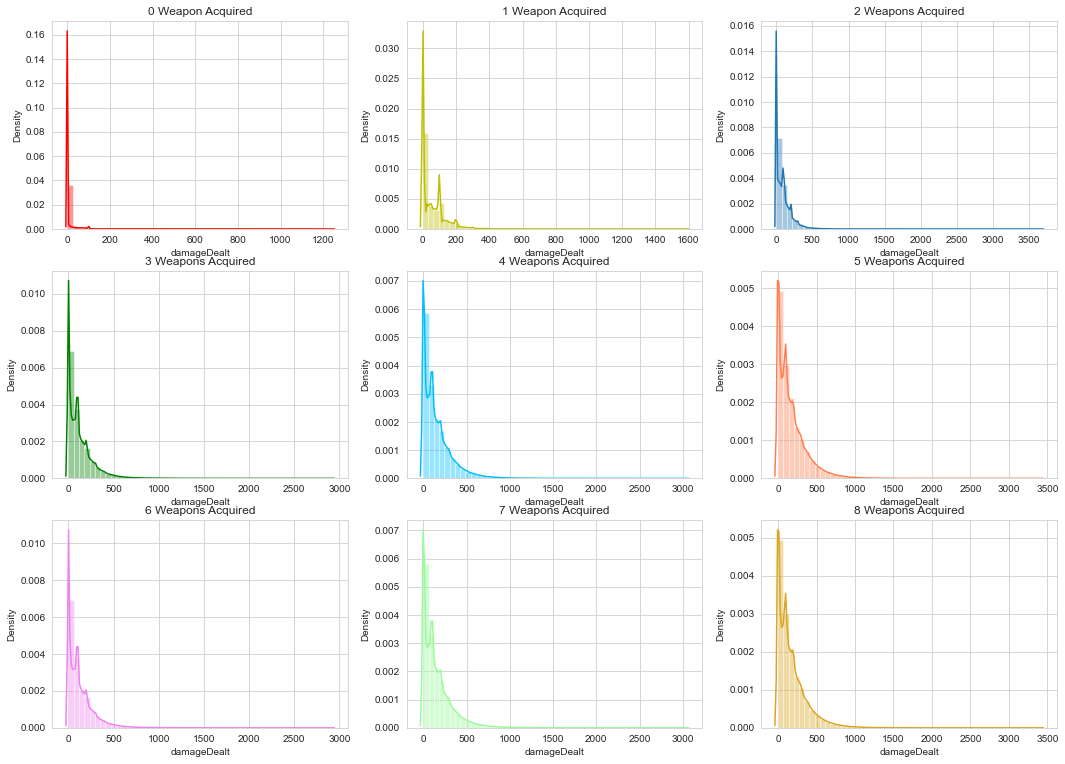

In [89]:
weapon_plot_data = train.copy()
fig,axes=plt.subplots(3,3,figsize=(18, 13))
wdata0 = weapon_plot_data[weapon_plot_data['weaponsAcquired']==0]
wdata1 = weapon_plot_data[weapon_plot_data['weaponsAcquired']==1]
wdata2 = weapon_plot_data[weapon_plot_data['weaponsAcquired']==2]
wdata3 = weapon_plot_data[weapon_plot_data['weaponsAcquired']==3]
wdata4 = weapon_plot_data[weapon_plot_data['weaponsAcquired']==4]
wdata5 = weapon_plot_data[weapon_plot_data['weaponsAcquired']==5]
wdata6 = weapon_plot_data[weapon_plot_data['weaponsAcquired']==6]
wdata7 = weapon_plot_data[weapon_plot_data['weaponsAcquired']==7]
wdata8 = weapon_plot_data[weapon_plot_data['weaponsAcquired']==8]

sns.distplot(wdata0['damageDealt'],vertical=False,ax=axes[0][0],color = 'r')
sns.distplot(wdata1['damageDealt'],vertical=False,ax=axes[0][1],color = 'y')
sns.distplot(wdata2['damageDealt'],vertical=False,ax=axes[0][2])
sns.distplot(wdata3['damageDealt'],vertical=False,ax=axes[1][0],color = 'g')
sns.distplot(wdata4['damageDealt'],vertical=False,ax=axes[1][1],color = 'deepskyblue')
sns.distplot(wdata5['damageDealt'],vertical=False,ax=axes[1][2],color = 'coral')
sns.distplot(wdata3['damageDealt'],vertical=False,ax=axes[2][0],color = 'violet')
sns.distplot(wdata4['damageDealt'],vertical=False,ax=axes[2][1],color = 'palegreen')
sns.distplot(wdata5['damageDealt'],vertical=False,ax=axes[2][2],color = 'goldenrod')

axes[0][0].title.set_text('0 Weapon Acquired')
axes[0][1].title.set_text('1 Weapon Acquired')
axes[0][2].title.set_text('2 Weapons Acquired')
axes[1][0].title.set_text('3 Weapons Acquired')
axes[1][1].title.set_text('4 Weapons Acquired')
axes[1][2].title.set_text('5 Weapons Acquired')
axes[2][0].title.set_text('6 Weapons Acquired')
axes[2][1].title.set_text('7 Weapons Acquired')
axes[2][2].title.set_text('8 Weapons Acquired')
plt.show()

可见，不论捡枪数量的多少，数据依旧是明显的长尾性质，所以可见捡枪固然对获胜有积极效应，但与前几个属性相比，其相关程度稍弱

玩家主要集中在拾取1-6把武器，我们对其的胜率做一个对比

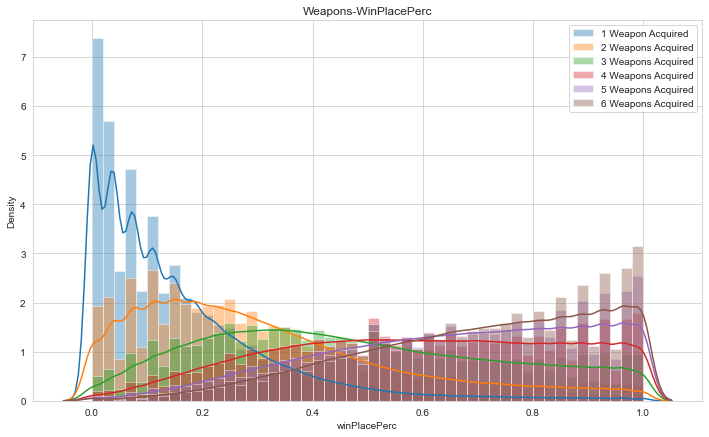

In [92]:
fig = plt.figure(figsize=(12, 7))
sns.distplot(wdata1['winPlacePerc'], kde=True,label='1 Weapon Acquired')
sns.distplot(wdata2['winPlacePerc'], kde=True,label='2 Weapons Acquired')
sns.distplot(wdata3['winPlacePerc'], kde=True,label='3 Weapons Acquired')
sns.distplot(wdata4['winPlacePerc'], kde=True,label='4 Weapons Acquired')
sns.distplot(wdata5['winPlacePerc'], kde=True,label='5 Weapons Acquired')
sns.distplot(wdata6['winPlacePerc'], kde=True,label='6 Weapons Acquired')
plt.legend()
plt.title('Weapons-WinPlacePerc')
plt.show()

观察武器数量——胜率的对比图，从颜色上可以看出，获得三把以上的武器的玩家，其胜利排名均值显著高于取得三把及以下的武器的玩家

### 移动距离对游戏获胜的影响

在这份PUBG数据中，有三类距离
1. 步行距离
2. 载具距离
3. 游泳距离

我们将其归纳为移动距离，进行分析

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(12, 7))
sns.jointplot(x = 'winPlacePerc', y = 'walkDistance', data = train, height=5, ratio = 3, color = 'deepskyblue',ax=axes[0])
sns.jointplot(x = 'winPlacePerc', y = 'swimDistance', data = train, height=5, ratio = 3, color = 'coral',ax=axes[1])
sns.jointplot(x = 'winPlacePerc', y = 'rideDistance', data = train, height=5, ratio = 3, color = 'green',ax=axes[2])
axes[0].title.set_text('walkDistance')
axes[1].title.set_text('swimDistance')
axes[2].title.set_text('rideDistance')
# 三张图放在一起，但是因为ride这个跑的非常慢所以还是分开展示
plt.show()

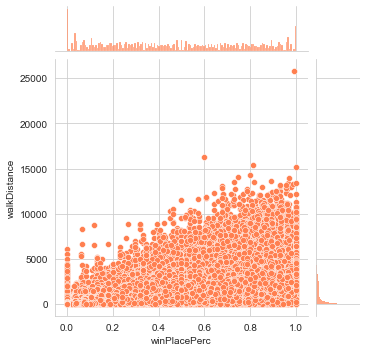

In [14]:
sns.jointplot(x = 'winPlacePerc', y = 'walkDistance', data = train, height=5, ratio = 5, color = 'coral')
plt.show()

可以看到步行距离与取胜之间明显的正相关关系

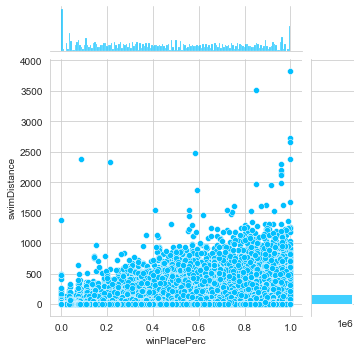

In [13]:
sns.jointplot(x = 'winPlacePerc', y = 'swimDistance', data = train, height=5, ratio =5, color = 'deepskyblue')
plt.show()

游泳距离也是正相关，但程度没有walkDistance这么大，稍后放在一起对比

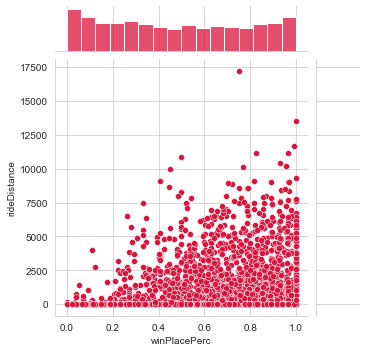

In [58]:
sns.jointplot(x = 'winPlacePerc', y='rideDistance', data = train[0:5000], height=5, ratio=5, color='crimson')
plt.show()
# 这组参数因为跑的特别慢，仅挑5,000个样本做一下展示

从对行走距离的联合分析图可以看出，距离的影响是显著的

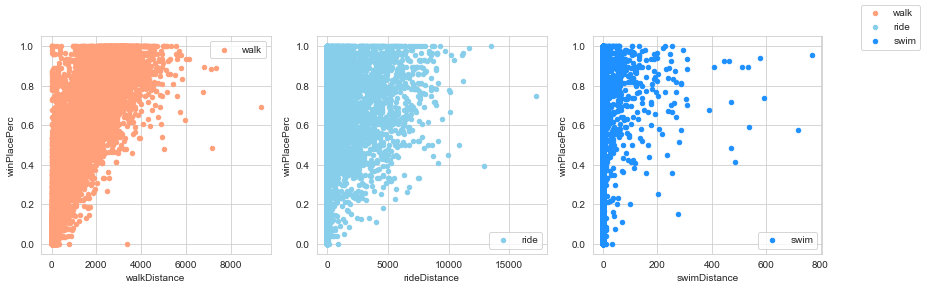

In [140]:
##WalkDistance, RideDistance, SwimDistance
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
train[:10000].plot.scatter(x='walkDistance', y='winPlacePerc',c='lightsalmon', ax=ax[0],label='walk')
train[:10000].plot.scatter(x='rideDistance', y='winPlacePerc',c='skyblue', ax=ax[1],label='ride')
train[:10000].plot.scatter(x='swimDistance', y='winPlacePerc',c='dodgerblue',ax=ax[2],label='swim')
fig.legend()

将它们一起对比后发现，walkDistance和rideDistance对比赛获胜的正相关程度略高于swimDistance

In [125]:
print("最大载具移动距离:", max(train.rideDistance), "m") #想必这位朋友是开着车兜了全地图
print("最大游泳移动距离:", max(train.swimDistance), "m") 
print("最大步行移动距离:", max(train.walkDistance), "m") 

最大载具移动距离: 40710.0 m
最大游泳移动距离: 3823.0 m
最大步行移动距离: 25780.0 m


### Data MISC

最后，对一些未被纳入考虑的数据做一些分析

#### 爆头击杀

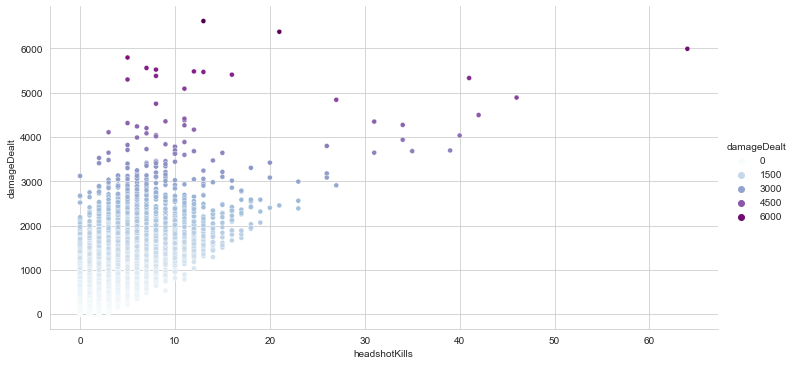

In [98]:
sns.relplot(x="headshotKills",
            y="damageDealt",
            data=train,
            s=25,
            palette='BuPu',
            hue='damageDealt',
            height=5,
            aspect=2)
plt.show()

可见，爆头击杀与玩家的伤害量关系显著，但是因为这是killings的一种，在建立回归模型时没有必要将从属于killings的数据也纳入模型，因为二者会导致严重的共线性

#### 连续击杀

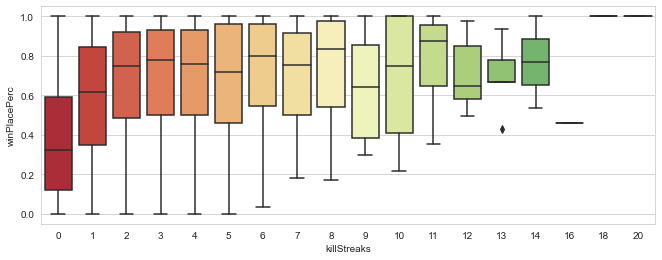

In [110]:
plt.figure(figsize = (11, 4))
sns.boxplot(x = 'killStreaks', y = 'winPlacePerc',data=train,palette='RdYlGn')
plt.show()

与之前相同，连续击杀与获胜也呈正相关关系，但在回归模型中同样使用killings涵盖

#### 长距离击杀

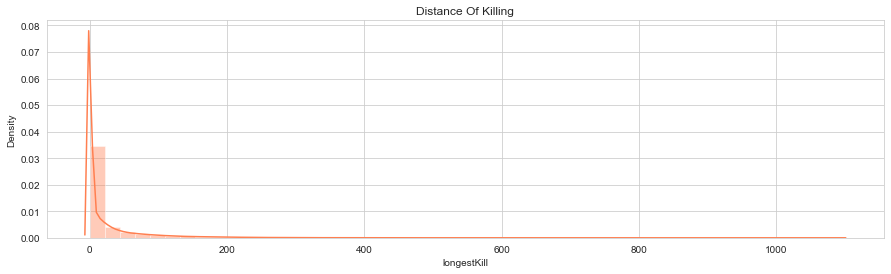

In [146]:
plt.figure(figsize=(15,5.5))
sns.distplot(train.longestKill,color="coral")
plt.title('Distance Of Killing')
plt.show()

可见绝大多数的击杀是在短距离内完成的

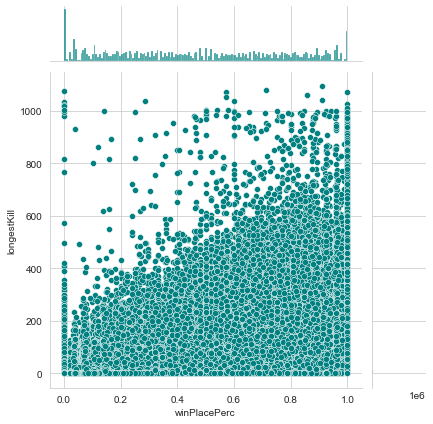

In [154]:
sns.jointplot(x='winPlacePerc', y='longestKill', data=train, color='teal')

可见击杀距离与胜利排名也存在一定的正相关性，我个人的理解是长程击杀往往代表着这个玩家的枪法比较好

## Prediction

接下来为比赛结果预测部分，从之前的数据分析来看，我们已经找出了能用于预测若干指标，剔除了不相干的因素，因此，我认为回归模型是一个合适的预测手段

挑选的变量如下
1. **assists** - Number of enemy players this player damaged that were killed by teammates.（助攻个数）
2. **boosts** - Number of boost items used.（提升能力的物品，应该指能量饮料或者肾上腺素这类的东西）
3. **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.（造成的伤害的总和，减去对自己造成的伤害）
4. **DBNOs** - Number of enemy players knocked.（比赛中击倒了多少个敌人，击倒不一定会死，可能会被队友救）
5. **heals** - Number of healing items used.（药品使用数量，绷带医药包之类的物品）
6. **kills** - Number of enemy players killed.（击杀敌人个数）
7. **rideDistance** - Total distance traveled in vehicles measured in meters.（在载具上的移动距离）
8. **walkDistance** - Total distance traveled on foot measured in meters.（行走距离）
9. **weaponsAcquired** - Number of weapons picked up.（捡了多少把武器）
10. **revives** - Number of times this player revived teammates.（救起队友次数）



### 使用线性回归模型

使用以下几个指标来衡量预测的结果
1. MSE
2. MAPE
3. 平均绝对误差（MAE）

再使用 $R^{2}$ 衡量拟合优度

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split#引入训练集和测试集随机划分模块
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error# 均方误差模块
from sklearn.linear_model import LinearRegression# 线性回归

先需要手动实现一个R方，用于衡量拟合优度

$$R^{2}(y, \hat{y})=1-\frac{\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}}{\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}$$

In [21]:
def Rsquare(y, y_pre):
    u = np.sum((y - y_pre) ** 2)
    v = np.sum((y - np.mean(y)) ** 2)
    return 1 - (u / v)
# 写完才发现metrics模块有，不过写起来也很简单

然后是MAE，衡量预测值与真实值之间的平均绝对误差

$$MAE=\frac{1}{n} \sum_{i=1}^{n}\left|y_{i}-\hat{y}_{i}\right|$$

In [22]:
def MAE(y, y_pre):
    return np.mean(np.abs(y - y_pre))

最后是MAPE

$$M A P E=\frac{1}{n} \sum_{i=1}^{n}\left|\frac{y_{i}-\hat{y}_{i}}{y_{i}}\right|$$

In [23]:
def MAPE(y, y_pre):
    return np.mean(np.abs((y - y_pre) / y))

In [24]:
def reg_eval(y,y_pre):
    print('MSE:',mean_squared_error(y,y_pre))
    print('MAE:',MAE(y,y_pre))
    print('MAPE:',MAPE(y,y_pre))
    print('RSquare:',Rsquare(y,y_pre))

经过刚刚的分析，在建立预测模型的时候，我们只挑选对比赛结果影响大的变量，如下所示

In [25]:
reg_data =  train[['assists', 'boosts', 'damageDealt', 'DBNOs', 'heals', 'kills', 'revives', 'rideDistance', 'walkDistance', 'weaponsAcquired', 'winPlacePerc']] 

In [74]:
reg_data = reg_data[:500000]
train_target = reg_data['winPlacePerc']

In [75]:
std_scaler = StandardScaler()#创建标准化对象
std_scaler.fit(reg_data)#fit数据
Reg_match_data  = std_scaler.transform(reg_data)#比例调节转化
Reg_match_data  = pd.DataFrame(Reg_match_data,
                               columns=reg_data.columns)#转化为df

In [76]:
X_train,X_test, y_train, y_test = train_test_split(Reg_match_data,train_target,test_size=0.3, random_state=10) #构造随机训练集和测试集

In [77]:
sgd_Reg = SGDRegressor()
sgd_Reg.fit(X_train,y_train)

SGDRegressor()

**Remark:** Check了下SGDRegressor的文档 *Linear model fitted by minimizing a regularized empirical loss with SGD*,依然是线性回归的方法,只不过采用了随机梯度方法

In [78]:
predictions=sgd_Reg.predict(X_test)
mse = mean_squared_error(predictions,y_test.values)

In [79]:
print('MSE:',mse)

MSE: 3.3428997805161387e-09


In [80]:
sgd_Reg.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [81]:
sgd_Reg.coef_

array([ 8.23404831e-07,  1.30387073e-05,  8.49096370e-06, -8.60577008e-06,
        2.66231820e-06,  6.51034130e-06,  1.88883119e-06,  5.96998258e-06,
        6.29358354e-05,  1.88804335e-05,  3.07295306e-01])

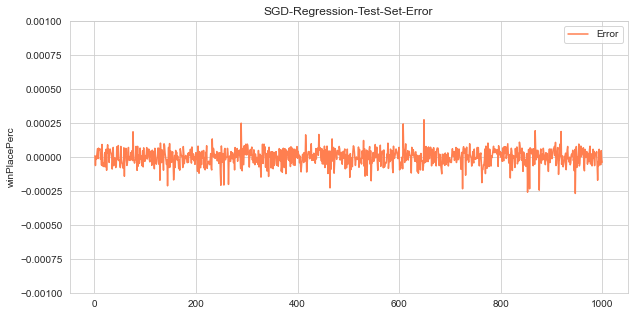

In [47]:
num = 1000
x = np.arange(1,num+1)
y = y_test.values[:num]
Y = predictions[:num]
fig = plt.figure(figsize=(10,5))
sns.lineplot(x=x,y=Y-y,label='Error',color='coral')
plt.ylim(ymin = -0.001)
plt.ylim(ymax = 0.001)
plt.legend()
plt.title('SGD-Regression-Test-Set-Error')
plt.ylabel('winPlacePerc')
plt.show()

In [48]:
print('R^2拟合优度(Goodness):',"{:.10}".format(Rsquare(Y,y)))
# print('R^2拟合优度(Goodness):',"{:.10}".format(r2_score(Y,y))) # 二者一致

R^2拟合优度(Goodness): 0.99999996


打印所有衡量指标，如下

In [49]:
reg_eval(Y,y)

MSE: 3.728167080283109e-09
MAE: 4.709163875509368e-05
MAPE: 0.043225176416969054
RSquare: 0.9999999600126206


可以看到，拟合的效果非常好，基本可以完成对比赛排名的有效预测

**Remark:** 用一般的线性回归也可以完成，如下

In [50]:
LinReg = LinearRegression()#创建线性回归实例
LinReg.fit(X_train,y_train)#训练数据

LinearRegression()

In [51]:
LinReg_preds = LinReg.predict(X_test)
LinReg_mse = mean_squared_error(LinReg_preds,y_test.values)

In [53]:
LinReg_mse

7.307140776551161e-31

几乎已经不存在什么误差了，拟合的效果同样非常好

### 岭回归

在此使用岭回归进行预测

岭回归是一种改良的最小二乘估计法，通过放弃最小二乘法的无偏性，以损失部分信息、降低精度为代价获得回归系数更为符合实际可靠的回归方法，可以解决多重共线性问题，防止出现不稳定的参数

In [29]:
from sklearn.linear_model import Ridge # 岭回归

In [33]:
RidgeReg = Ridge(alpha=1.0) #alpha为岭系数

In [34]:
RidgeReg.fit(X_train,y_train)#训练数据

Ridge()

In [35]:
RidgeReg_preds = RidgeReg.predict(X_test)
RidgeReg_mse = mean_squared_error(RidgeReg_preds,y_test.values)

In [37]:
RidgeReg_mse

2.748936535623514e-12

同样挑选1000个样本，可视化拟合误差

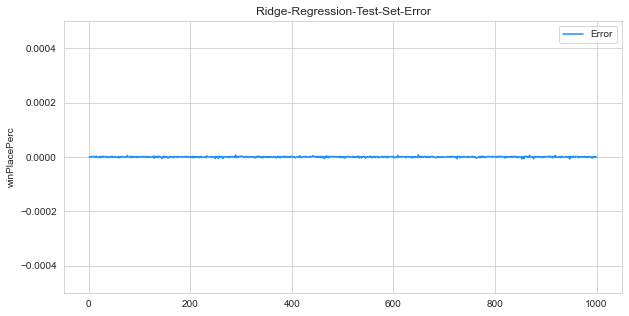

In [123]:
num = 1000
x = np.arange(1,num+1)
y = y_test.values[:num]
Y = predictions[:num]
fig = plt.figure(figsize=(10,5))
sns.lineplot(x=x,y=RidgeReg_preds[:1000]-y,label='Error',color='dodgerblue')
plt.ylim(ymin = -1e-4)
plt.ylim(ymax = 5e-4)
plt.legend()
plt.title('Ridge-Regression-Test-Set-Error')
plt.ylabel('winPlacePerc')
plt.show()

可见岭回归的效果很出色

### 随机森林

除了上述两种模型，再尝试一下基于随机森林的回归方法

In [44]:
from sklearn.ensemble.forest import RandomForestRegressor

In [46]:
rfc = RandomForestRegressor()                      #实例化
rfc = rfc.fit(X_train,y_train)                      #用训练集数据训练模型
result = rfc.score(X_test,y_test)                   #导入测试集，从接口中调用需要的信息

In [84]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [49]:
print('Random Forest Regressor R^2:',result)

Random Forest Regressor R^2: 0.9999999985422234


使用$R^{2}$作为评价标准，可见，与上述两种模型一样，随机森林也可以很好地拟合数据

### 对于提高游戏胜率:
本次实验花了相当大的篇幅来做数据分析，主要是探索数据之间的关联以及变量对游戏结果的影响程度，对游戏取得高排名的结论总结罗列如下
1. Killings与排名/吃鸡概率正相关，同样，可以推出击杀排名越高，以及对敌人造成的伤害量(DamageDealt)越大，Killings多，获得高排名和吃鸡的几率高。
2. 使用boosting物品（能量饮料，肾上腺素等）越多，吃鸡概率越高，所以保持一直是喝着饮料的状态，努力找三级头三级甲会是个好选择。
3. 使用的医疗用品数量与排名现著正相关，努力收集这类资源（绷带，医疗包，医药箱等）对长期的生存有益（只要包放得下）。
4. 适当多地拾取武器
5. 距离与排名高度正相关，这一方面是因为缩圈躲毒强迫发生的位移，另一方面多移动会带来更多的资源，对游戏获胜会是个好选择。
6. 关于是否组队是一个难以通过预测的出的结论，首先组队比赛的赛制不同，如有revive功能，其排名也与solo比赛不在一起，是否组队取决于队友的质量（比如前面分析的友军误伤就会很无语...）

